<a href="https://colab.research.google.com/github/Epsita-R/AML/blob/main/2348517_CIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read csv file into pandas dataframe
data = pd.read_csv('/content/watson_healthcare_CIA.csv')

In [ ]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0.0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1.0,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,54.0,0.0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,56.0,0.0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1.0,6,3,3,2,2,2,2


In [ ]:
#check for null values
data.isnull().sum()

EmployeeID                   0
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours               34
Shift                        9
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

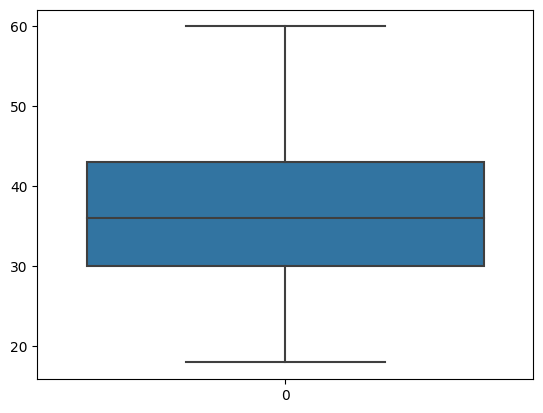

<Axes: >

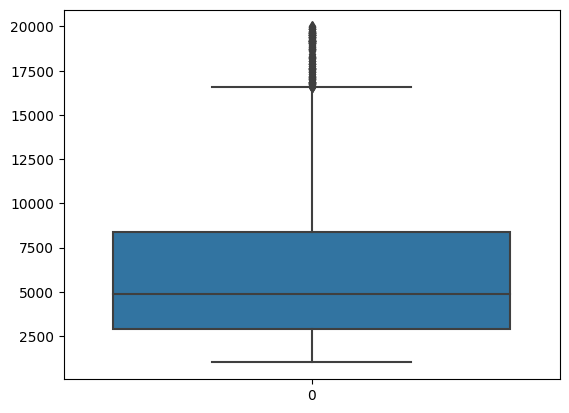

In [ ]:
#checking for outliers
sns.boxplot(data['Age'])
plt.show()
sns.boxplot(data['MonthlyIncome'])

In [ ]:
#handling outliers
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))
drop_outlier(data,data['MonthlyIncome'])

(1606, 36)
New data shape post deletion: (1527, 36)


In [ ]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,best
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,80.0,0.0,8,0,1,6,4,0,5,6892.631073
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,80.0,1.0,10,3,3,10,7,1,7,8510.605162
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,54.0,0.0,7,3,3,0,0,0,0,6083.644029
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,56.0,0.0,8,3,3,8,7,3,0,5274.656985
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,80.0,1.0,6,3,3,2,2,2,2,4061.176418


In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the required columns
X = data[['Age']]  # Predictor variable
y = data['MonthlyIncome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Coefficients and Intercept
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 7378636.892045026
R-squared Score: 0.2047581635638177
Coefficient: [144.27144127]
Intercept: 226.5611326631324


Linear Regression:
Mean Squared Error: 54054928.60625935
R-squared Score: 0.00034635341726285684

Quadratic Regression:
Mean Squared Error: 53862440.60362533
R-squared Score: 0.0039060904980042777

Cubic Regression:
Mean Squared Error: 53854921.05116699
R-squared Score: 0.004045151786761125


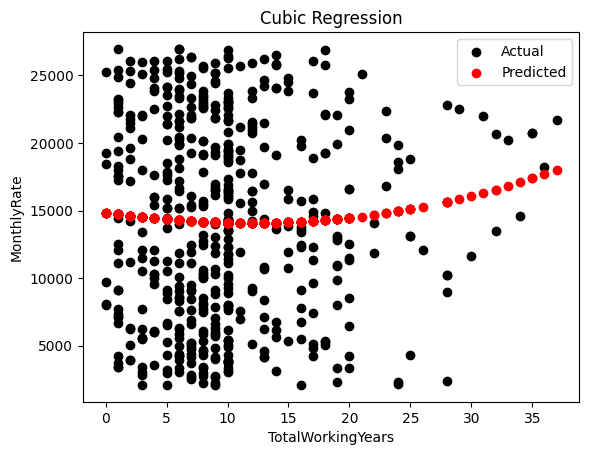

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['TotalWorkingYears']]  # Predictor variable
y = data['MonthlyRate']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression - Quadratic
poly_features = PolynomialFeatures(degree=2)
X_train_quad = poly_features.fit_transform(X_train)
X_test_quad = poly_features.transform(X_test)

quad_model = LinearRegression()
quad_model.fit(X_train_quad, y_train)

# Polynomial Regression - Cubic
poly_features_cubic = PolynomialFeatures(degree=3)
X_train_cubic = poly_features_cubic.fit_transform(X_train)
X_test_cubic = poly_features_cubic.transform(X_test)

cubic_model = LinearRegression()
cubic_model.fit(X_train_cubic, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_quad = quad_model.predict(X_test_quad)
y_pred_cubic = cubic_model.predict(X_test_cubic)

# Evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_quad = mean_squared_error(y_test, y_pred_quad)
r2_quad = r2_score(y_test, y_pred_quad)

mse_cubic = mean_squared_error(y_test, y_pred_cubic)
r2_cubic = r2_score(y_test, y_pred_cubic)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared Score: {r2_linear}")
print("\nQuadratic Regression:")
print(f"Mean Squared Error: {mse_quad}")
print(f"R-squared Score: {r2_quad}")
print("\nCubic Regression:")
print(f"Mean Squared Error: {mse_cubic}")
print(f"R-squared Score: {r2_cubic}")

# Plotting the results for the cubic regression
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_cubic, color='red', label='Predicted')
plt.title('Cubic Regression')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyRate')
plt.legend()
plt.show()


Linear Regression:
Mean Squared Error: 4906264.018176612
R-squared Score: 0.4638337194640848

Quadratic Regression:
Mean Squared Error: 4881012.822064176
R-squared Score: 0.46659322034877626

Cubic Regression:
Mean Squared Error: 4893159.7654633885
R-squared Score: 0.4652657782384234


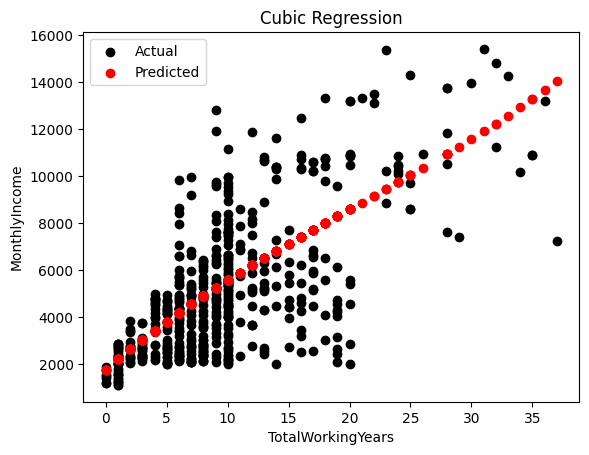

In [ ]:
X = data[['TotalWorkingYears']]  # Predictor variable
y = data['MonthlyIncome']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression - Quadratic
poly_features = PolynomialFeatures(degree=2)
X_train_quad = poly_features.fit_transform(X_train)
X_test_quad = poly_features.transform(X_test)

quad_model = LinearRegression()
quad_model.fit(X_train_quad, y_train)

# Polynomial Regression - Cubic
poly_features_cubic = PolynomialFeatures(degree=3)
X_train_cubic = poly_features_cubic.fit_transform(X_train)
X_test_cubic = poly_features_cubic.transform(X_test)

cubic_model = LinearRegression()
cubic_model.fit(X_train_cubic, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_quad = quad_model.predict(X_test_quad)
y_pred_cubic = cubic_model.predict(X_test_cubic)

# Evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_quad = mean_squared_error(y_test, y_pred_quad)
r2_quad = r2_score(y_test, y_pred_quad)

mse_cubic = mean_squared_error(y_test, y_pred_cubic)
r2_cubic = r2_score(y_test, y_pred_cubic)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared Score: {r2_linear}")
print("\nQuadratic Regression:")
print(f"Mean Squared Error: {mse_quad}")
print(f"R-squared Score: {r2_quad}")
print("\nCubic Regression:")
print(f"Mean Squared Error: {mse_cubic}")
print(f"R-squared Score: {r2_cubic}")

# Plotting the results for the cubic regression
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_cubic, color='red', label='Predicted')
plt.title('Cubic Regression')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.legend()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns

# Dropping the target variable
if 'MonthlyIncome' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['MonthlyIncome'])

# Handling missing values if any
numerical_data = numerical_data.dropna()

# Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

# Calculate VIF for each attribute
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data_scaled.values, i) for i in range(len(numerical_data_scaled.columns))]

# Filter predictors based on VIF (VIF > 5 or 10 indicates high multicollinearity)
high_vif = vif_data[vif_data['VIF'] > 5]

print("Features with high VIF:")
print(high_vif)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features with high VIF:
   Feature  VIF
1      Age  inf
25    best  inf


In [ ]:
import statsmodels.api as sm

final_predictors = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = data[final_predictors]  # Predictor variables
y = data['MonthlyRate']  # Target variable

# Adding a constant to the predictors for intercept
X = sm.add_constant(X)

# Fitting the multiple regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MonthlyRate   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.881
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0947
Time:                        06:07:24   Log-Likelihood:                -15715.
No. Observations:                1527   AIC:                         3.144e+04
Df Residuals:                    1521   BIC:                         3.147e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Polynomial Regression (Degree 4):
Mean Squared Error: 53958547.76356589
R-squared Score: 0.002128752605337514


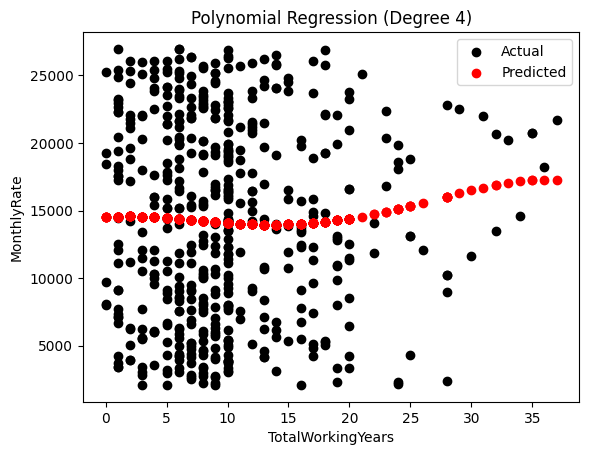

Polynomial Regression (Degree 5):
Mean Squared Error: 53851618.48752101
R-squared Score: 0.004106227064758827


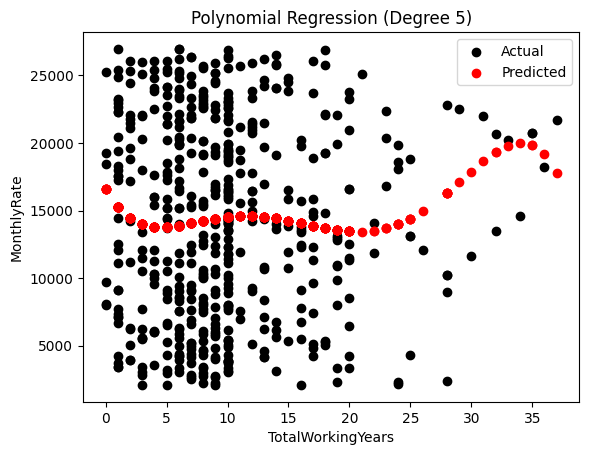

Polynomial Regression (Degree 6):
Mean Squared Error: 53726999.533033006
R-squared Score: 0.006410841935211908


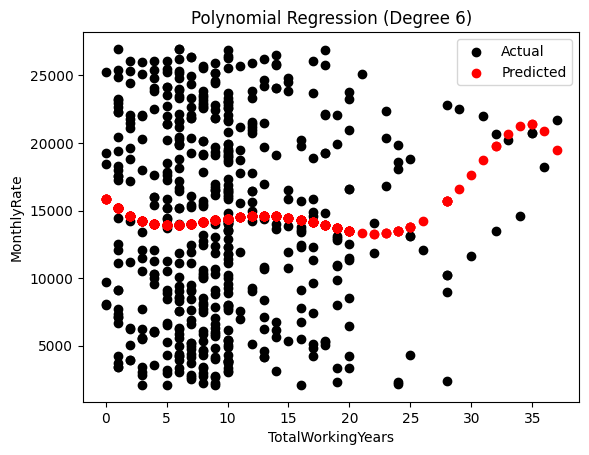

In [ ]:
X = data[['TotalWorkingYears']]  # Predictor variable
y = data['MonthlyRate']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# List to store results for different polynomial degrees
degrees = [4, 5, 6]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Polynomial Regression Model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Evaluation metrics
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial Regression (Degree {degree}):")
    print(f"Mean Squared Error: {mse_poly}")
    print(f"R-squared Score: {r2_poly}")

    # Plotting the results
    plt.scatter(X_test, y_test, color='black', label='Actual')
    plt.scatter(X_test, y_pred_poly, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('TotalWorkingYears')
    plt.ylabel('MonthlyRate')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X = data[['TotalWorkingYears']]  # Predictor variable
y = data['MonthlyRate']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# List of alpha values to iterate over
alphas = np.linspace(0.01, 100, 25)

# Store eliminated attributes for each alpha value
eliminated_attributes = []

for alpha in alphas:
    # LASSO Regression Model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Store coefficients and identify eliminated attributes
    eliminated = list(X.columns[lasso_model.coef_ == 0])
    eliminated_attributes.append(eliminated)

# Find the eliminated attributes for each alpha value
for idx, alpha in enumerate(alphas):
    print(f"For alpha = {alpha:.2f}, Eliminated attributes: {eliminated_attributes[idx]}")


For alpha = 0.01, Eliminated attributes: []
For alpha = 4.18, Eliminated attributes: []
For alpha = 8.34, Eliminated attributes: []
For alpha = 12.51, Eliminated attributes: []
For alpha = 16.68, Eliminated attributes: []
For alpha = 20.84, Eliminated attributes: []
For alpha = 25.01, Eliminated attributes: []
For alpha = 29.17, Eliminated attributes: []
For alpha = 33.34, Eliminated attributes: []
For alpha = 37.51, Eliminated attributes: []
For alpha = 41.67, Eliminated attributes: []
For alpha = 45.84, Eliminated attributes: []
For alpha = 50.00, Eliminated attributes: []
For alpha = 54.17, Eliminated attributes: []
For alpha = 58.34, Eliminated attributes: []
For alpha = 62.50, Eliminated attributes: []
For alpha = 66.67, Eliminated attributes: []
For alpha = 70.84, Eliminated attributes: []
For alpha = 75.00, Eliminated attributes: []
For alpha = 79.17, Eliminated attributes: []
For alpha = 83.33, Eliminated attributes: []
For alpha = 87.50, Eliminated attributes: []
For alpha = 9

In [ ]:
from sklearn.model_selection import cross_val_score
X = data[['TotalWorkingYears']]  # Predictor variable
y = data['MonthlyRate']  # Target variable

# List of alpha values
alphas = np.linspace(0.01, 100, 25)

# Perform N-fold cross-validation for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X, y, cv=5)

    print(f"For alpha = {alpha:.2f}, Mean R-squared: {np.mean(scores):.4f}")


For alpha = 0.01, Mean R-squared: -0.0023
For alpha = 4.18, Mean R-squared: -0.0023
For alpha = 8.34, Mean R-squared: -0.0023
For alpha = 12.51, Mean R-squared: -0.0023
For alpha = 16.68, Mean R-squared: -0.0023
For alpha = 20.84, Mean R-squared: -0.0023
For alpha = 25.01, Mean R-squared: -0.0023
For alpha = 29.17, Mean R-squared: -0.0023
For alpha = 33.34, Mean R-squared: -0.0023
For alpha = 37.51, Mean R-squared: -0.0023
For alpha = 41.67, Mean R-squared: -0.0023
For alpha = 45.84, Mean R-squared: -0.0023
For alpha = 50.00, Mean R-squared: -0.0023
For alpha = 54.17, Mean R-squared: -0.0023
For alpha = 58.34, Mean R-squared: -0.0023
For alpha = 62.50, Mean R-squared: -0.0023
For alpha = 66.67, Mean R-squared: -0.0023
For alpha = 70.84, Mean R-squared: -0.0023
For alpha = 75.00, Mean R-squared: -0.0023
For alpha = 79.17, Mean R-squared: -0.0023
For alpha = 83.33, Mean R-squared: -0.0023
For alpha = 87.50, Mean R-squared: -0.0023
For alpha = 91.67, Mean R-squared: -0.0023
For alpha = 95

In [ ]:

numerical_data = data.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns

# Dropping the target variable if present
if 'PercentSalaryHike' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['PercentSalaryHike'])

# Handling missing values if any
numerical_data = numerical_data.dropna()

# Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

# Calculate VIF for each attribute
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data_scaled.values, i) for i in range(len(numerical_data_scaled.columns))]

# Filter predictors based on VIF (lower VIF values indicate less multicollinearity)
useful_predictors = vif_data[vif_data['VIF'] < 5]

print("Predictors with VIF < 5:")
print(useful_predictors)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Predictors with VIF < 5:
                     Feature       VIF
0                 EmployeeID  1.011446
2                  DailyRate  1.022822
3           DistanceFromHome  1.017520
4                  Education  1.062793
6    EnvironmentSatisfaction  1.014977
7                 HourlyRate  1.026298
8             JobInvolvement  1.029426
10           JobSatisfaction  1.017992
12               MonthlyRate  1.023964
13        NumCompaniesWorked  1.268931
14         PerformanceRating  1.012270
15  RelationshipSatisfaction  1.016685
16             StandardHours  1.014768
17                     Shift  1.020380
18         TotalWorkingYears  3.734799
19     TrainingTimesLastYear  1.014519
20           WorkLifeBalance  1.013749
21            YearsAtCompany  4.807968
22        YearsInCurrentRole  2.884772
23   YearsSinceLastPromotion  1.597533
24      YearsWithCurrManager  2.866125


In [ ]:
#Predictors with lower VIF (VIF < 5) are considered less correlated and can be considered more useful for prediction.
#Higher VIF indicates multicollinearity.

In [ ]:
# Fit the model (using scikit-learn)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate on train set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate on test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Adjusted R-squared using statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model_sm = sm.OLS(y_train, X_train_sm).fit()
adj_r2_train = model_sm.rsquared_adj

# Print evaluation metrics
print("Evaluation metrics for the Linear Regression model:")
print(f"Train set - MSE: {mse_train}, R-squared: {r2_train}, Adjusted R-squared: {adj_r2_train}")
print(f"Test set - MSE: {mse_test}, R-squared: {r2_test}")


Evaluation metrics for the Linear Regression model:
Train set - MSE: 49638494.26157569, R-squared: 0.0005766716882946721, Adjusted R-squared: -0.0004177793846522615
Test set - MSE: 54054928.60625935, R-squared: 0.00034635341726285684
